In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('./data/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [114]:
# total number of actions
len(df.action)

8188

In [115]:
# number of unique users
df.id.nunique()

6328

In [116]:
# size of control group and experiment group
#df.groupby('group').count()
df.groupby('group').nunique()

,timestamp,id,group,action
group,,,,
control,4264,3332,1,2
experiment,3924,2996,1,2


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [117]:
# duration of this experiment
from datetime import datetime
s1 = min(df.timestamp)
s2 = max(df.timestamp)
FMT = '%Y-%m-%d %H:%M:%S.%f'
tdelta = datetime.strptime(s2, FMT) - datetime.strptime(s1, FMT)
tdelta
s1, s2

('2016-09-24 17:42:27.839496', '2017-01-18 10:24:08.629327')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [118]:
# action types in this experiment
df.groupby('action').nunique()

,timestamp,id,group,action
action,,,,
click,1860,1860,2,1
view,6328,6328,2,1


### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer

### 5. Define the click through rate (CTR) for this experiment.

Answer

In [119]:
# all actions from control group
control_df = df.query('group == "control"')

In [120]:
# click-through rate
# nb of users who clicked divided by nb of users who viewed
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
control_ctr

0.2797118847539016

In [121]:
# all actions from experiment group
experiment_df = df.query('group == "experiment"')

In [122]:
# click-through rate
# nb of users who clicked divided by nb of users who viewed
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.3097463284379172

In [123]:
# difference
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [124]:
# to check that difference is significant, bootstrap distribution
diffs = []
for _ in range (10000):
    bootsample = df.sample(df.shape[0], replace=True)
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

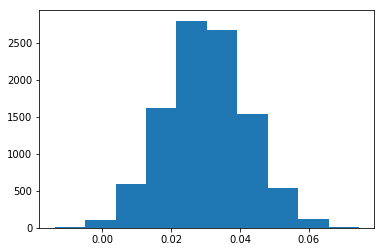

In [125]:
plt.hist(diffs);

In [126]:
# p-value is observed difference in proportion,
# can be calculated by simulate distribution under null hypothesis, 
# and then find probability that statistic came from this distribution
# >> To simulate from null, create null distribution centered at zero
# with same std as sampling distribution simulated above
diffs = np.array(diffs)
null_valls = np.random.normal(0, diffs.std(), diffs.size)

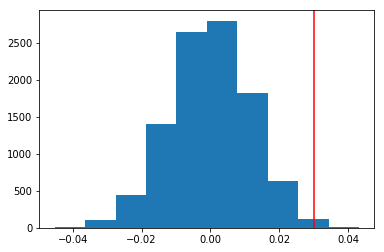

In [127]:
plt.hist(null_valls);
plt.axvline(x=obs_diff, color='red');

In [128]:
# find p-value like this:
# all values that are 'more extreme' than our statistic
(null_valls > obs_diff).mean()

0.0041999999999999997

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: $$
$$H_1: $$